# Getting Started with pandas

In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Introduction to pandas Data Structures

### Series

In [10]:
obj2 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']) 
obj2.index  #你可以通过Series 的values和index属性获取其数组表示形式和索引对象：

Index(['a', 'b', 'c', 'd'], dtype='object')

In [19]:
obj2.values

array([1, 2, 3, 4], dtype=int64)

In [7]:
obj2['a']   #索引
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [52]:
obj2>2

a    False
b    False
c     True
d     True
dtype: bool

In [53]:
obj2[obj2 > 2] #使用NumPy函数或类似NumPy的运算，都会保留索引值的链接

c    3
d    4
dtype: int64

In [20]:
obj2 * 2
np.exp(obj2)

a     2.718282
b     7.389056
c    20.085537
d    54.598150
dtype: float64

In [21]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [22]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [24]:
obj4.isnull()#pandas的isnull和notnull函数可用于检测缺失数

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [29]:
obj3+obj4  #它会根据运算的索引标签自动对齐数据

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [30]:
obj  #Series的索引可以通过赋值的方式就地修改

0    4
1    7
2   -5
3    3
dtype: int64

In [31]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame 
DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字
符串、布尔值等）。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用
同一个索引）
虽然DataFrame是以二维结构保存数据的，但你仍然可以轻松地将其表示为更高维度
的数据（层次化索引的表格型结构，这是pandas中许多高级数据处理功能的关键要素，我们
会在第8章讨论这个问题）。

In [32]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [33]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six']) #如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列,
frame2                                       #如果传入的列在数据中找不到，就会在结果中产生缺失值

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [34]:
frame2['state']  #通过类似字典标记的方式或属性的方式，可以将DataFrame的列获取为一个Series：
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [35]:
frame2.loc['three'] #行也可以通过位置或名称的方式进行获取，比如用loc属性

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [37]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five']) #将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。
                      #如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失值
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [38]:
frame2['eastern'] = frame2.state == 'Ohio' #为不存在的列赋值会创建出一个新列,我先添加一个新的布尔值的列，state是否为'Ohio'：
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [40]:
frame2.values #如果DataFrame各列的数据类型不同，则值数组的dtype就会选用能兼容所有列的数据类型
#跟Series一样，values属性也会以二维ndarray的形式返回DataFrame中的数据

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 索引对象

In [4]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index[1:]    #

Index(['b', 'c'], dtype='object')

In [5]:
index[1] = 'd' # TypeError    Index对象是不可变的，因此用户不能对其进行修改,不可变可以使Index对象在多个数据结构之间安全共享

TypeError: Index does not support mutable operations

## Essential Functionality

### Dropping Entries from an Axis

In [45]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [46]:
obj.drop('c')
obj.drop(['d', 'c'])   #原obj不变

a    0.0
b    1.0
e    4.0
dtype: float64

In [47]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [48]:
data.drop(['Colorado', 'Ohio']) #用标签序列调用drop会从行标签（axis 0）删除值

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [49]:
data.drop('two', axis=1) #通过传递axis=1或axis='columns'可以删除列的值
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [50]:
obj.drop('c', inplace=True)#许多函数，如drop，会修改Series或DataFrame的大小或形状，可以就地修改对象，不会返回新的对象：
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection, and Filtering

In [54]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj
obj['b']  #可以通过索引
obj[['b', 'a', 'd']]
obj[1]    #可以通过值
obj[2:4]
obj[[1, 3]]
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [55]:
obj['b':'c'] #利用标签的切片运算与普通的Python切片运算不同，其末端是包含的

b    1.0
c    2.0
dtype: float64

In [56]:
obj['b':'c'] = 5  #用切片可以对Series的相应部分进行设置
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [66]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [67]:
data['two']
data[['three', 'one']] #用一个值或序列对DataFrame进行索引其实就是获取一个或多个列

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [68]:
data[:2] #这种索引方式有几个特殊的情况。首先通过切片或布尔型数组选取数据行

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [69]:
data[data['three'] > 5] #索引行

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [70]:
data < 5 #另一种用法是通过布尔型DataFrame（比如下面这个由标量比较运算得出的）进行索引
data[data<5]

,one,two,three,four
Ohio,0.0,1.0,2.0,3.0
Colorado,4.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN


In [71]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Selection with loc and iloc

In [ ]:
data.loc['Colorado', ['two', 'three']]  #使用标签（loc）或整数索引（iloc）

In [ ]:
data.iloc[2, [3, 0, 1]]
data.iloc[[1, 2], [3, 0, 1]]

In [74]:
data.iloc[:, :3][data.three > 5]  #切片索引

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


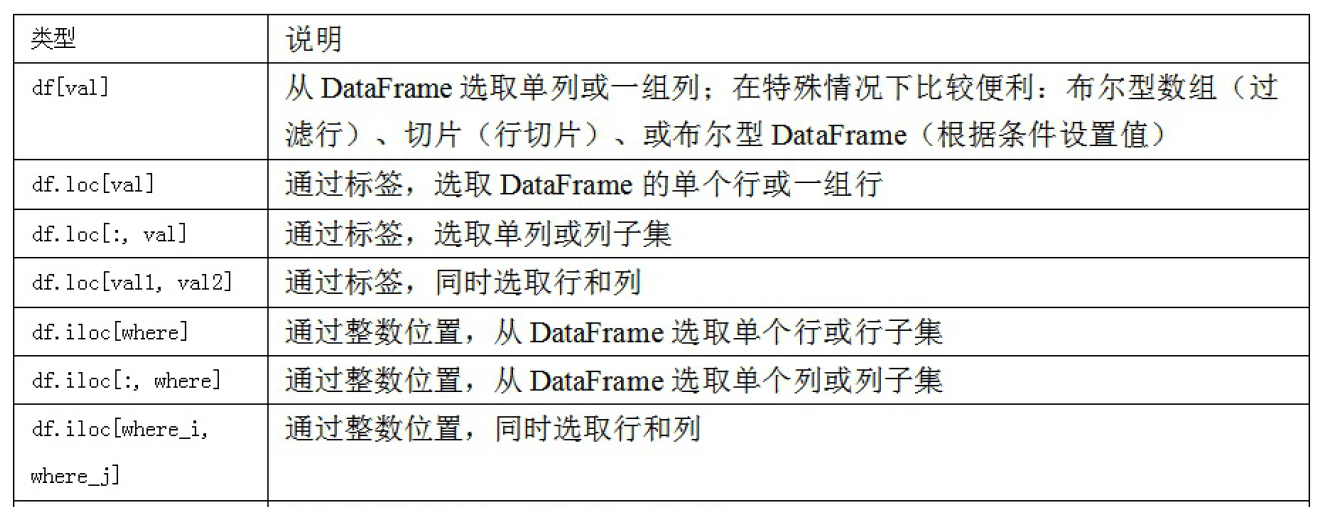

### Arithmetic and Data Alignment

In [76]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

In [77]:
s1 + s2  #在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集
#自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播。

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

#### Operations between DataFrame and Series

In [83]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame,series

(          b     d     e
 Utah    0.0   1.0   2.0
 Ohio    3.0   4.0   5.0
 Texas   6.0   7.0   8.0
 Oregon  9.0  10.0  11.0,
 b    0.0
 d    1.0
 e    2.0
 Name: Utah, dtype: float64)

In [84]:
frame - series  #默认按照列进行广播，如果想按照行广播，需要用函数

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


### Function Application and Mapping

In [85]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [86]:
f = lambda x: x.max() - x.min()
frame.apply(f) #这里的函数f，计算了一个Series的最大值和最小值的差，在frame的每列都执行了一次。结果是一个Series，使用frame的列作为索引。

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [87]:
frame.apply(f, axis='columns') #如果传递axis='columns'到apply，这个函数会在每行执行：

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

In [91]:
format = lambda x: '%.2f' % x
frame.applymap(format) #元素级的Python函数也是可以用的。假如你想得到frame中各个浮点值的格式化字符串，使用applymap即可：

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [92]:
frame['e'].map(format)#某一列

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

## 5.3 Summarizing and Computing Descriptive Statistics

In [93]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [94]:
df.sum() #默认列

one    9.25
two   -5.80
dtype: float64

In [95]:
df.sum(axis='columns') #传入axis='columns'或axis=1将会按行进行求和运算

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [96]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [99]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4) #对于非数值型数据，describe会产生另外一种汇总统计
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and Covariance

In [ ]:
returns.corr() #DataFrame的corr和cov方法将以DataFrame的形式分别返回完整的相关系数或协方差矩阵：
returns.cov()

### Unique Values, Value Counts, and Membership

In [100]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [101]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [102]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [103]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [104]:
result = data.apply(pd.value_counts).fillna(0)
result #这里，结果中的行标签是所有列的唯一值。后面的频率值是每个列中这些值的相应计数。

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


### 填充缺省值

In [17]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[1]=np.nan
df

,0,1,2
0,1.327195,-0.919262,-1.549106
1,NaN,NaN,NaN
2,0.862580,-0.010032,0.050009
3,0.670216,0.852965,-0.955869
4,-0.023493,-2.304234,-0.652469
5,-1.218302,-1.332610,1.074623


In [32]:
df.fillna(method='ffill') #用临近值填充

,0,1,2
0,1.327195,-0.919262,-1.549106
1,1.327195,-0.919262,-1.549106
2,0.862580,-0.010032,0.050009
3,0.670216,0.852965,-0.955869
4,-0.023493,-2.304234,-0.652469
5,-1.218302,-1.332610,1.074623


In [29]:
df.fillna(df.mean(),axis=0) #用均值填充,还有inplace就地操作

,0,1,2
0,1.327195,-0.919262,-1.549106
1,0.323639,-0.742634,-0.406562
2,0.862580,-0.010032,0.050009
3,0.670216,0.852965,-0.955869
4,-0.023493,-2.304234,-0.652469
5,-1.218302,-1.332610,1.074623


In [33]:
df.fillna(method=df.mean())#产生歧义原因是行和列索引值都为012

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().